# Binary classification

## 0. Import libraries

In [1]:
import tensorflow as tf
#!git clone https://github.com/ngohongthai/ml_helper --branch tensorflow-deep-learning

tf.__version__

'2.9.1'

## 1. Download and visualize data

In [2]:
import utils
%load_ext autoreload
%autoreload 2

data_url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
data_dir = utils.download_data(data_url, "pizza_steak")
data_dir

[INFO] data/pizza_steak directory exists, skipping download.


PosixPath('data/pizza_steak')

In [3]:
utils.walk_through_dir(data_dir)

There are 250 images in 'data/pizza_steak/test/pizza'.
There are 250 images in 'data/pizza_steak/test/steak'.
There are 750 images in 'data/pizza_steak/train/pizza'.
There are 750 images in 'data/pizza_steak/train/steak'.


In [4]:
random_images = utils.get_random_images(num_images=3, data_path=data_dir)
random_images

array([PosixPath('data/pizza_steak/train/steak/3894222.jpg'),
       PosixPath('data/pizza_steak/test/steak/2716791.jpg'),
       PosixPath('data/pizza_steak/train/steak/1476404.jpg')],
      dtype=object)

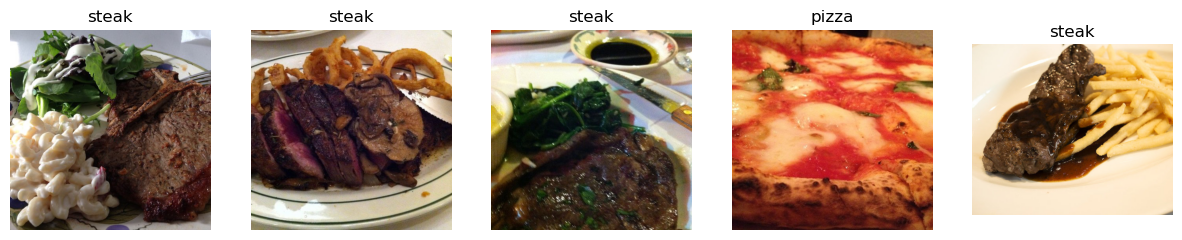

In [5]:
utils.plot_random_images(num_images=5, data_path=data_dir)

## 2. Preprocess the data

In [6]:
import data_setup

train_dir = data_dir/"train"
test_dir = data_dir/"test"

train_datasets, test_datasets = data_setup.create_datasets(
    train_dir = train_dir, 
    test_dir = test_dir)
train_datasets, test_datasets

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


(<keras.preprocessing.image.DirectoryIterator at 0x7ff3d088b700>,
 <keras.preprocessing.image.DirectoryIterator at 0x7ff3d089bc10>)

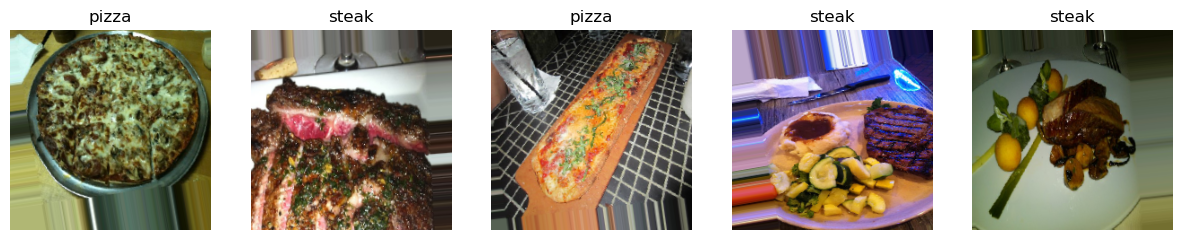

In [7]:
utils.plot_random_augmented_image(num_images=5, 
                                  datasets=train_datasets)

## 3. Create the model

In [8]:
import model_builder

model1 = model_builder.create_tiny_vgg(input_shape=(224, 224, 3),
                                       hidden_units=10,
                                       out_features=2)
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

2022-12-22 13:29:12.753039: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
from tensorflow.keras.optimizers import Adam
model1.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

## 4. Fit the model

In [10]:
results = model1.fit(train_datasets,
                     epochs=5,
                     steps_per_epoch=len(train_datasets),
                     validation_data=test_datasets,
                     validation_steps=len(test_datasets))

Epoch 1/5
47/47 [==============================] - 45s 938ms/step - loss: 0.6390 - accuracy: 0.6287 - val_loss: 0.4838 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 51s 1s/step - loss: 0.5109 - accuracy: 0.7673 - val_loss: 0.3822 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 50s 1s/step - loss: 0.4898 - accuracy: 0.7707 - val_loss: 0.4496 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 47s 990ms/step - loss: 0.5100 - accuracy: 0.7560 - val_loss: 0.3455 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 45s 946ms/step - loss: 0.4581 - accuracy: 0.8027 - val_loss: 0.4163 - val_accuracy: 0.8060


## 5. Evaluate the model

In [11]:
results.history

{'loss': [0.6390254497528076,
  0.5108823180198669,
  0.4897933006286621,
  0.5099722146987915,
  0.45805516839027405],
 'accuracy': [0.6286666393280029,
  0.7673333287239075,
  0.7706666588783264,
  0.7559999823570251,
  0.8026666641235352],
 'val_loss': [0.48376286029815674,
  0.38216298818588257,
  0.4495663642883301,
  0.34553268551826477,
  0.4163415729999542],
 'val_accuracy': [0.7799999713897705,
  0.8600000143051147,
  0.8019999861717224,
  0.8560000061988831,
  0.8059999942779541]}

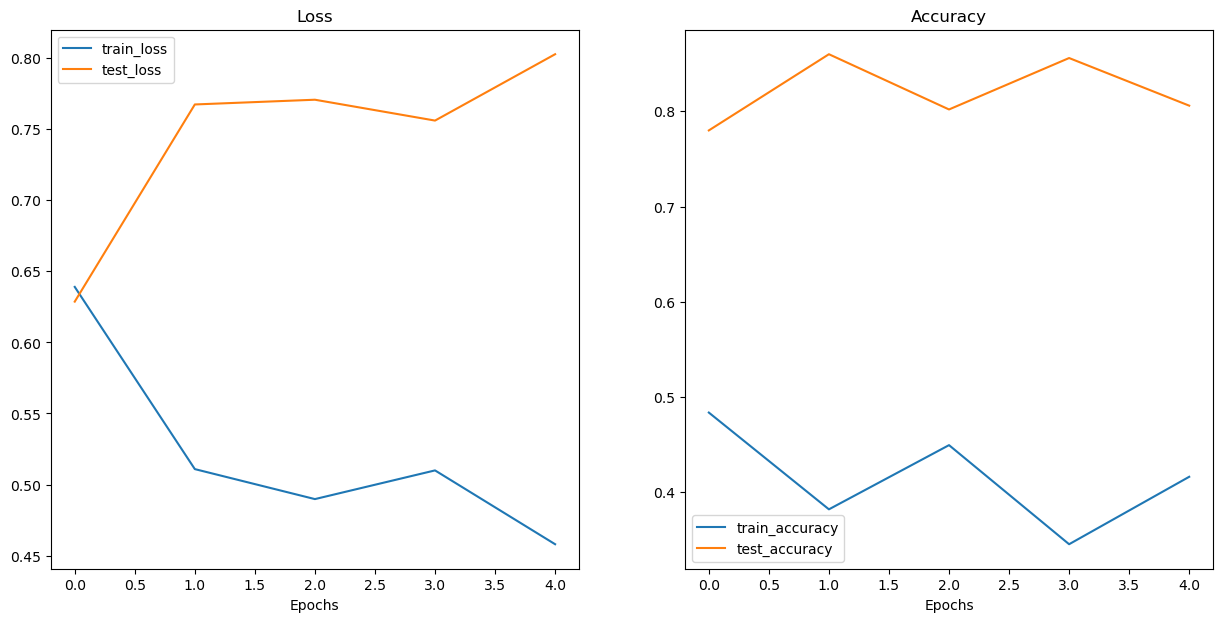

In [12]:
utils.plot_loss_curves(results.history)

1/1 [==============================] - 0s 55ms/step


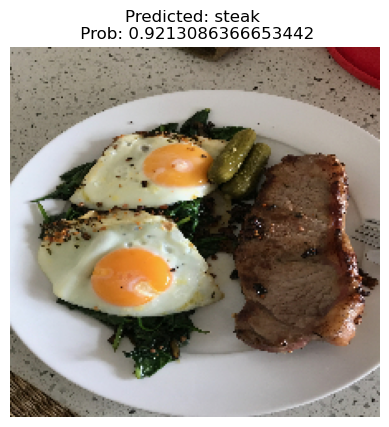

In [35]:
import predictions

# Making a prediction
#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
predictions.pred_and_plot_image(model1,
                        image_path = "03-steak.jpeg",
                        image_shape = 224,
                        class_names = list(train_datasets.class_indices.keys()))

## Save models

In [33]:
model1.save("models/tiny_vgg_vs1")

INFO:tensorflow:Assets written to: models/tiny_vgg_vs1/assets


INFO:tensorflow:Assets written to: models/tiny_vgg_vs1/assets


## Load models

In [34]:
loaded_model = tf.keras.models.load_model("models/tiny_vgg_vs1")
loaded_model.evaluate(test_datasets)

16/16 [==============================] - 4s 227ms/step - loss: 0.4163 - accuracy: 0.8060


[0.4163415729999542, 0.8059999942779541]

# Multi-class Classification

## 1.Download and visualize data

In [36]:
data_url = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"
data_dir = utils.download_data(data_url, "10_food_classes_all_data")
data_dir

[INFO] Did not find data/10_food_classes_all_data directory, creating one...
[INFO] Downloading 10_food_classes_all_data.zip from https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip...
[INFO] Unzipping 10_food_classes_all_data.zip data...


PosixPath('data/10_food_classes_all_data')

In [37]:
utils.walk_through_dir(data_dir)

There are 250 images in 'data/10_food_classes_all_data/test/chicken_curry'.
There are 250 images in 'data/10_food_classes_all_data/test/chicken_wings'.
There are 250 images in 'data/10_food_classes_all_data/test/fried_rice'.
There are 250 images in 'data/10_food_classes_all_data/test/grilled_salmon'.
There are 250 images in 'data/10_food_classes_all_data/test/hamburger'.
There are 250 images in 'data/10_food_classes_all_data/test/ice_cream'.
There are 250 images in 'data/10_food_classes_all_data/test/pizza'.
There are 250 images in 'data/10_food_classes_all_data/test/ramen'.
There are 250 images in 'data/10_food_classes_all_data/test/steak'.
There are 250 images in 'data/10_food_classes_all_data/test/sushi'.
There are 750 images in 'data/10_food_classes_all_data/train/chicken_curry'.
There are 750 images in 'data/10_food_classes_all_data/train/chicken_wings'.
There are 750 images in 'data/10_food_classes_all_data/train/fried_rice'.
There are 750 images in 'data/10_food_classes_all_data

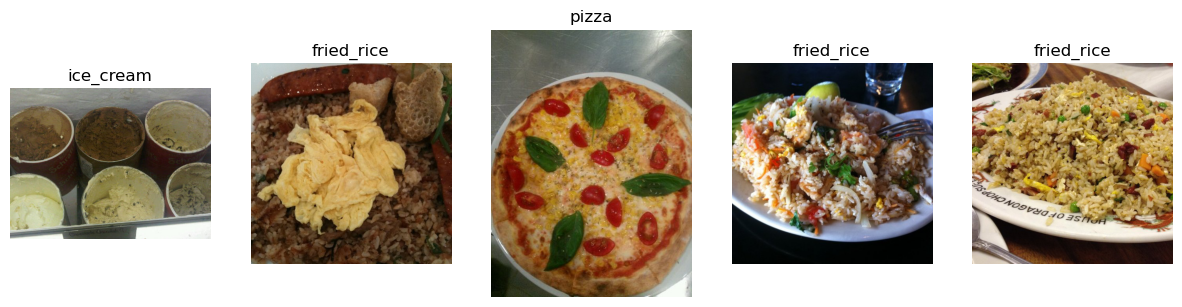

In [39]:
utils.plot_random_images(num_images=5, 
                         data_path = data_dir)

## 2.Preprocessing data

In [43]:
train_dir = data_dir/"train"
test_dir = data_dir/"test"


train_datasets, test_datasets = data_setup.create_datasets(
    train_dir = train_dir, 
    test_dir = test_dir,
    target_size = (224, 224),
    batch_size = 32, 
    class_mode = "categorical", # categorical or binary
    shuffle = True,
)

train_datasets, test_datasets, train_datasets.class_indices

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


(<keras.preprocessing.image.DirectoryIterator at 0x7ff3d0228640>,
 {'chicken_curry': 0,
  'chicken_wings': 1,
  'fried_rice': 2,
  'grilled_salmon': 3,
  'hamburger': 4,
  'ice_cream': 5,
  'pizza': 6,
  'ramen': 7,
  'steak': 8,
  'sushi': 9})

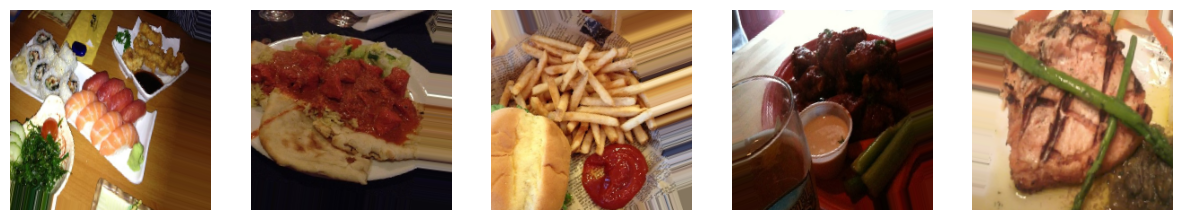

In [55]:
utils.plot_random_augmented_image(num_images=5, datasets = train_datasets)

In [58]:
class_names = list(train_datasets.class_indices.keys())
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

## 3.Create the model

In [59]:
import model_builder
model2 = model_builder.create_tiny_vgg(input_shape = (224, 224, 3), 
                                       hidden_units = 10, 
                                       out_features = len(class_names))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

## 4.Fit the model

In [62]:
model2.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)
result2 = model2.fit(train_datasets,
                     epochs = 5,
                     steps_per_epoch =  len(train_datasets),
                     validation_data = test_datasets,
                     validation_steps = len(test_datasets))

Epoch 1/5
235/235 [==============================] - 243s 1s/step - loss: 2.1563 - accuracy: 0.2175 - val_loss: 1.9970 - val_accuracy: 0.2984
Epoch 2/5
235/235 [==============================] - 288s 1s/step - loss: 2.0354 - accuracy: 0.2769 - val_loss: 1.9079 - val_accuracy: 0.3152
Epoch 3/5
235/235 [==============================] - 298s 1s/step - loss: 1.9754 - accuracy: 0.3067 - val_loss: 1.8166 - val_accuracy: 0.3696
Epoch 4/5
235/235 [==============================] - 246s 1s/step - loss: 1.9298 - accuracy: 0.3261 - val_loss: 1.8286 - val_accuracy: 0.3760
Epoch 5/5
235/235 [==============================] - 242s 1s/step - loss: 1.8999 - accuracy: 0.3436 - val_loss: 1.7345 - val_accuracy: 0.4144


## 5. Evaluate the model

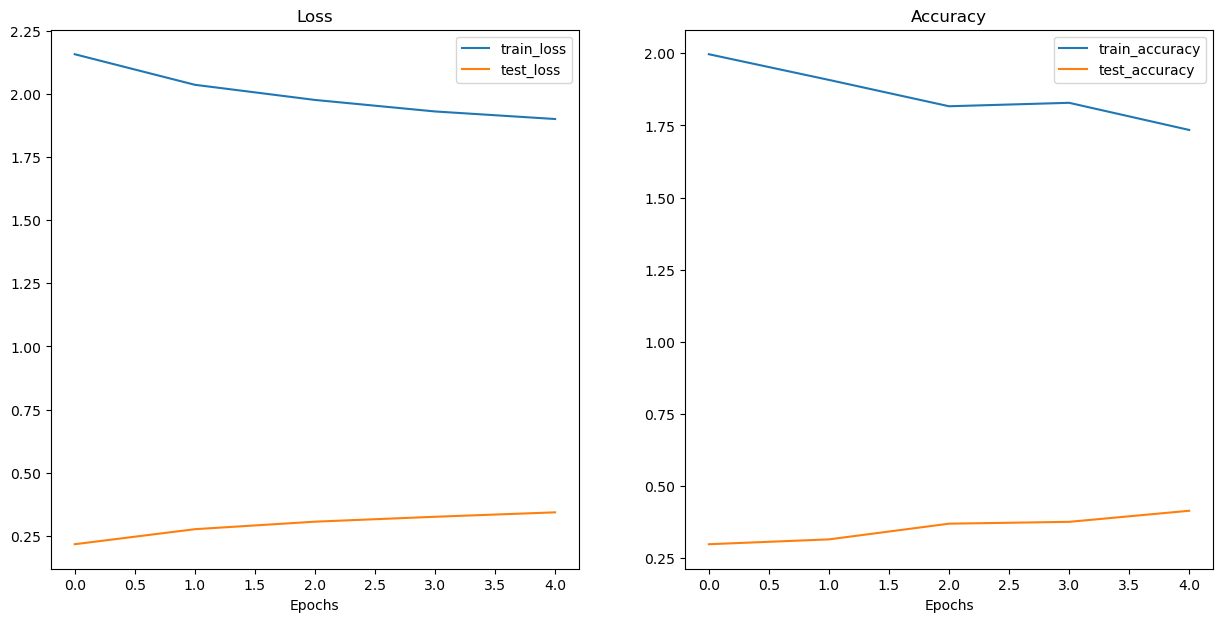

In [63]:
utils.plot_loss_curves(result2.history)

1/1 [==============================] - 0s 83ms/step


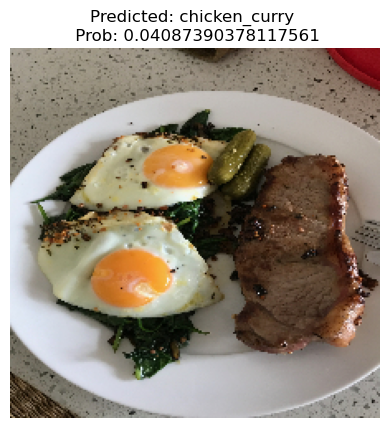

In [64]:
import predictions

# Making a prediction
#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
predictions.pred_and_plot_image(model2,
                        image_path = "03-steak.jpeg",
                        image_shape = 224,
                        class_names = class_names)

In [65]:
model2.evaluate(test_datasets)

79/79 [==============================] - 19s 238ms/step - loss: 1.7345 - accuracy: 0.4144


[1.7344566583633423, 0.41440001130104065]

In [66]:
# !wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
# !wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
# !wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 29ms/step


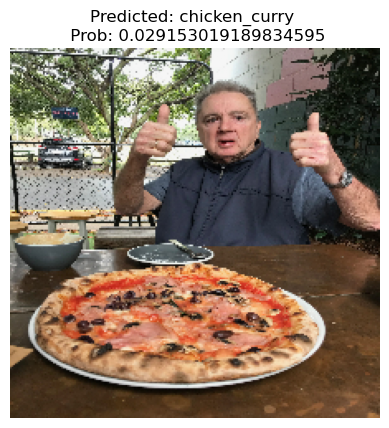

In [67]:
predictions.pred_and_plot_image(model2,
                        image_path = "03-pizza-dad.jpeg",
                        image_shape = 224,
                        class_names = class_names)

1/1 [==============================] - 0s 25ms/step


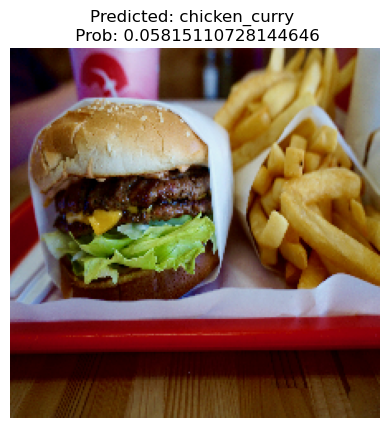

In [68]:
predictions.pred_and_plot_image(model2,
                        image_path = "03-hamburger.jpeg",
                        image_shape = 224,
                        class_names = class_names)